
--- TRAIN DATA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

  

<ipython-input-2-58e2187b2490>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-2-58e2187b2490>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

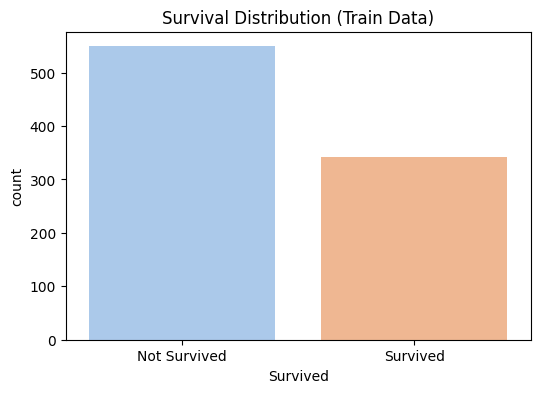

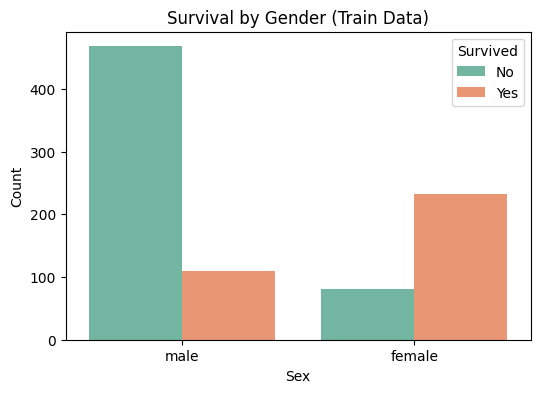

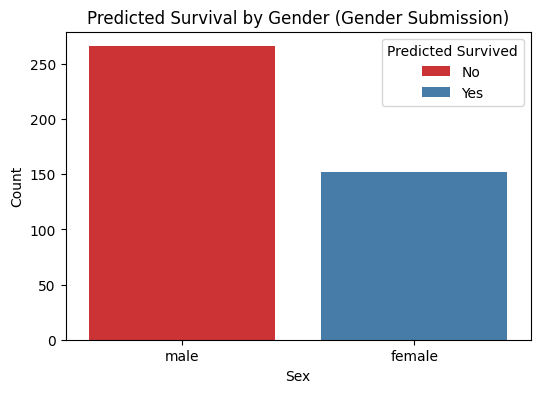


--- Actual Survival Rate (Train) ---
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

--- Predicted Survival Rate (Gender Submission) ---
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_df = pd.read_csv('/content/gender_submission.csv')

# Merge gender submission predictions with test data
test_with_predictions = test_df.merge(gender_df, on='PassengerId')

# ----- BASIC INFO -----
print("\n--- TRAIN DATA ---")
print(train_df.info())
print(train_df.head())

print("\n--- TEST DATA ---")
print(test_df.info())
print(test_df.head())

print("\n--- GENDER SUBMISSION ---")
print(gender_df.info())
print(gender_df.head())

# ----- CLEAN TRAIN DATA -----
# Fill missing Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
# Fill missing Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
# Drop Cabin due to many missing values
train_df.drop(columns=['Cabin'], inplace=True)

# ----- ANALYSIS -----

# 1. Survival Distribution in Training Data
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette='pastel')
plt.title('Survival Distribution (Train Data)')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# 2. Gender vs Survival (Train Data)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='Set2')
plt.title('Survival by Gender (Train Data)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 3. Predicted Survival by Gender (Test Data + Gender Submission)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=test_with_predictions, palette='Set1')
plt.title('Predicted Survival by Gender (Gender Submission)')
plt.ylabel('Count')
plt.legend(title='Predicted Survived', labels=['No', 'Yes'])
plt.show()

# 4. Compare Survival Rate in Train vs Predicted in Test
train_gender_survival = train_df.groupby('Sex')['Survived'].mean()
predicted_gender_survival = test_with_predictions.groupby('Sex')['Survived'].mean()

print("\n--- Actual Survival Rate (Train) ---")
print(train_gender_survival)

print("\n--- Predicted Survival Rate (Gender Submission) ---")
print(predicted_gender_survival)